## Import Appropriate Libraries for Analysis

In [ ]:
# import libraries

import numpy as np              # used for algebra      
import pandas as pd         # used for data manipulation and data analysis           
import matplotlib.pyplot as plt # used for visualisations
from google.colab import drive
drive.mount("/content/drive") #mounting access to google drive
import warnings 

KeyboardInterrupt: ignored

## 1. Data manipulation and cleansing
You have two options to access the data.

In the first option, the dataset is structured in a way that makes updates very convenient: every day, a new file is simply added to the repository. This means working with multiple separate CSV files. This is not suitable for an efficient analysis.

In the second option, the dataset is structured around three separate files (confirmed cases, deaths, recovered patients), but the number of columns increases with each update of the dataset.

You need to select one option, and then represent your data in a way that will make your analysis possible. In doing so, you need to keep the following in mind:

There may be inconsistencies in the formats used or errors in the data. How are you handling that?
It is good practice to separate code and data. Your solution has to work for these files, but should also be usable if you had more files (in option 1) or more columns (in option 2). This is especially important as we may end up using an expanded dataset, as explained earlier.

In [ ]:
# load confirmed cases data
data_conf = pd.read_csv( "/content/drive/My Drive/data/time_series_19-covid-Confirmed.csv" )

# load deaths data
data_deaths = pd.read_csv( "/content/drive/My Drive/data/time_series_19-covid-Deaths.csv" )

#load recovered data
data_recov = pd.read_csv( "/content/drive/My Drive/data/time_series_19-covid-Recovered.csv" )

#load country population figures
data_pop = pd.read_csv( "/content/drive/My Drive/data/population-figures-by-country-csv_csv.csv" )

In [ ]:
print(data_conf.info())

print(data_deaths.info())

print(data_recov.info())

print(data_pop.info())

# province state is the only area with null data in all three data sets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  322 non-null    object 
 1   Country/Region  468 non-null    object 
 2   Lat             468 non-null    float64
 3   Long            468 non-null    float64
 4   1/22/20         468 non-null    int64  
 5   1/23/20         468 non-null    int64  
 6   1/24/20         468 non-null    int64  
 7   1/25/20         468 non-null    int64  
 8   1/26/20         468 non-null    int64  
 9   1/27/20         468 non-null    int64  
 10  1/28/20         468 non-null    int64  
 11  1/29/20         468 non-null    int64  
 12  1/30/20         468 non-null    int64  
 13  1/31/20         468 non-null    int64  
 14  2/1/20          468 non-null    int64  
 15  2/2/20          468 non-null    int64  
 16  2/3/20          468 non-null    int64  
 17  2/4/20          468 non-null    int

In [ ]:
print("Covid 19 Case Confirmation columns")
print(data_conf.columns.tolist())
print()
print("Covid 19 Deaths columns")
print(data_deaths.columns.tolist())
print()
print("Covid 19 Recovered columns")
print(data_recov.columns.tolist())

Covid 19 Case Confirmation columns
['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20']

Covid 19 Deaths columns
['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11

In [ ]:
# How many days do we have in the data set?

dims = data_conf.shape

numDays = dims[1] - 4

print("We have data reported over %d days across all three datasets." %numDays)

We have data reported over 58 days across all three datasets.


In [ ]:
# how many unique countries do we have in the data set?

countries = data_conf['Country/Region'] # set countries variable
numCountries = len(countries.unique())

print(countries.unique()) # find the unique countries
print()
print("We have the COVID19 data of %d countries." %numCountries) # how many unique countries

['Thailand' 'Japan' 'Singapore' 'Nepal' 'Malaysia' 'Canada' 'Australia'
 'Cambodia' 'Sri Lanka' 'Germany' 'Finland' 'United Arab Emirates'
 'Philippines' 'India' 'Italy' 'Sweden' 'Spain' 'Belgium' 'Egypt'
 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait' 'Algeria'
 'Croatia' 'Switzerland' 'Austria' 'Israel' 'Pakistan' 'Brazil' 'Georgia'
 'Greece' 'North Macedonia' 'Norway' 'Romania' 'Estonia' 'San Marino'
 'Belarus' 'Iceland' 'Lithuania' 'Mexico' 'New Zealand' 'Nigeria'
 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan' 'Armenia'
 'Dominican Republic' 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco'
 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Hungary'
 'Liechtenstein' 'Poland' 'Tunisia' 'Bosnia and Herzegovina' 'Slovenia'
 'South Africa' 'Bhutan' 'Cameroon' 'Colombia' 'Costa Rica' 'Peru'
 'Serbia' 'Slovakia' 'Togo' 'Malta' 'Martinique' 'Bulgaria' 'Maldives'
 'Bangladesh' 'Paraguay' 'Albania' 'Cyprus' 'Brunei' 'US' 'Burkina Faso'
 'Holy See'

In [ ]:
# dropping columns for confirmed covid-19 cases
confirmedTimeSeries = data_conf.drop(["Province/State", "Lat", "Long"], axis=1)

# dropping columns for confirmed covid-19 deaths
deathsTimeSeries = data_deaths.drop(["Province/State", "Lat", "Long"], axis=1)

# dropping columns for confirmed covid-19 recoveries
recoveredTimeSeries = data_recov.drop(["Province/State", "Lat", "Long"], axis=1)

# for the confirmed covid19 cases
confirmedTimeSeries = confirmedTimeSeries.groupby( "Country/Region" , as_index=False).sum()

# and for the confirmed covid19 deaths
deathsTimeSeries = deathsTimeSeries.groupby( "Country/Region", as_index=False).sum()

# and for the confirmed covid19 recoveries
recoveredTimeSeries = recoveredTimeSeries.groupby( "Country/Region", as_index=False).sum() 


In [ ]:
confirmedTimeSeries.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1


In [ ]:
recoveredTimeSeries.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
deathsTimeSeries.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# create new data frame for active cases

# copy confirmed data frame
activeTimeSeries = confirmedTimeSeries.copy()

# for each iteration in columns following 1: output new variable. 
for i in activeTimeSeries.columns[1:]:
    activeTimeSeries[i] =activeTimeSeries[i] - recoveredTimeSeries[i] - deathsTimeSeries[i] # where active cases equal confirmed cases - recovered cases - deaths

activeTimeSeries.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,20,21,21,21
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,11,22,32,37,41,50,54,57,62
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,15,16,22,32,38,44,55,46
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,38,38,52
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1


## 2. Descriptive analysis and initial data exploration
Please address the following questions:

1. How many countries have reported at least 10 cases?



In [ ]:
# how many countries have reported at least 10 cases?

THRESHOLD = 10   # create threshold variable of 10

confCasesPerCountry = confirmedTimeSeries.iloc[:,-1]

numCountriesAbove10Cases = len(confCasesPerCountry[ confCasesPerCountry >= THRESHOLD ])

print("There are %d countries that have reported at least 10 cases. " %numCountriesAbove10Cases)


There are 110 countries that have reported at least 10 cases. 


2. What are the five countries with the highest number of active cases?




In [ ]:
# What are the five countries with highest number of active cases?

#sort active time series by highest number of cases by 5 countries
topFiveCountries = activeTimeSeries.sort_values(by=["3/19/20"], ascending=False).head(5) 

#extract these countries to a list
topFiveCountriesList = topFiveCountries['Country/Region'].to_list()

print("The top five countries with the highest number of active cases in descending order are " + str(topFiveCountriesList))

The top five countries with the highest number of active cases in descending order are ['Italy', 'Spain', 'Germany', 'US', 'Iran']


3. What is the current rate of increase in the total number of cases, based on the last week of data?


In [ ]:
# What is the current rate of increase in the total number of cases, based on the last week of data?

# filters the last week of data on the time series
lastWeek = confirmedTimeSeries[['3/13/20','3/14/20','3/15/20','3/16/20','3/17/20','3/18/20','3/19/20']]

# calculates the rate of increase of the last week by calculating the sum of each column, and dividing by start of week
rateOfIncrease = round(lastWeek['3/19/20'].sum() / lastWeek['3/13/20'].sum() * 100, 2)

# last day cummulative sum divided by the first day of week cummulative sum * 100 for percentage
print('The current rate of increase in the total number of cases based on the last week of data is ' + str(rateOfIncrease) + '%.')

The current rate of increase in the total number of cases based on the last week of data is 167.16%.


## 3. Data normalisation
The data is reported by country (and sometimes by state or province), as well as by date. This is a useful starting point, but has two limitations:

Not all countries have the same population—5,000 cases in a country with 6 million inhabitants is not the same as 5,000 cases in a country with 95 million inhabitants.
The outbreak did not start on the same day in every country. On any given day, one country might beat the peak of the outbreak, while in another, community transmission is only just starting to occur.
Using external data where appropriate, normalise your data so that you can more meaningfully compare across territories. For any territory, we recommend using the day that the territory reaches or exceeds 10 confirmed cases as 'day 0' of the outbreak.

In [ ]:
data_pop.head()

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,Year_1968,Year_1969,Year_1970,Year_1971,Year_1972,Year_1973,Year_1974,Year_1975,Year_1976,Year_1977,Year_1978,Year_1979,Year_1980,Year_1981,Year_1982,Year_1983,Year_1984,Year_1985,Year_1986,Year_1987,Year_1988,Year_1989,Year_1990,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277,89005,90853,92898,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999,19403676,20093756,20966463,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318,15949766,16440924,16983266,17572649.0,18203369.0,18865716.0,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530,3108778,3089027,3060173,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142,64370,65390,67341,70049.0,73182.0,76244.0,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [ ]:
# create new dataFrame with country and population in 2016

dataPop2016 = data_pop[['Country', 'Year_2016']]

# rename columns
dataPop2016.columns = ['Country/Region', 'Population_2016']

# drop rows that have NA values
dataPop2016 = dataPop2016.dropna(axis=0) 

dataPop2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 262
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country/Region   262 non-null    object 
 1   Population_2016  262 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


In [ ]:
# add population column into data_conf and match by country
data_conf = pd.merge(confirmedTimeSeries, dataPop2016) 

data_conf.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,Population_2016
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,34656032.0
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,2876101.0
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,40606052.0
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,77281.0
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,100963.0


In [ ]:
# scale countries by cases per million, and round to 4 decimal places
conf_data_scaled = round(data_conf.iloc[:,3:64].div(data_conf.Population_2016, axis=0) * 1000000, 5) 

# join countries back onto dataframe
countryRegion = data_conf['Country/Region']

conf_data_scaled = conf_data_scaled.join(countryRegion, how='inner')

#  drop population from DataFrame
conf_data_scaled.drop('Population_2016', axis=1)

,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,Country/Region
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02886,0.02886,0.02886,0.02886,0.02886,0.02886,0.02886,0.02886,0.02886,0.02886,0.02886,0.02886,0.02886,0.11542,0.11542,0.14428,0.20199,0.20199,0.20199,0.31741,0.46168,0.60596,0.63481,0.63481,0.63481,Afghanistan
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.69539,3.47693,4.17232,7.99694,11.47387,13.21233,14.60310,17.73234,19.12311,20.51388,22.25235,Albania
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02463,0.02463,0.02463,0.02463,0.02463,0.02463,0.07388,0.12313,0.29552,0.29552,0.41866,0.41866,0.46791,0.49254,0.49254,0.49254,0.59104,0.64030,0.91119,1.18209,1.32985,1.47761,1.82239,2.14254,Algeria
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.93979,12.93979,12.93979,12.93979,12.93979,12.93979,12.93979,12.93979,12.93979,12.93979,12.93979,12.93979,12.93979,12.93979,25.87958,504.65185,504.65185,685.80893,Andorra
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.90462,9.90462,9.90462,9.90462,9.90462,9.90462,9.90462,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.03047,0.03047,0.03047,0.03047,0.03047,0.03047,0.03047,0.04571,0.04571,0.04571,0.12188,0.12188,0.13712,0.13712,0.13712,0.13712,0.13712,0.13712,0.13712,0.13712,0.13712,0.13712,0.13712,0.13712,0.19806,0.19806,0.19806,0.22853,0.30471,0.35041,0.54847,0.60941,0.77700,1.31023,1.76729,2.49858,3.15370,4.17446,4.90575,5.85034,6.99298,6.99298,12.21867,17.42913,17.44437,23.62988,29.86110,40.25154,41.37895,United Kingdom
131,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.16144,1.16144,2.32288,8.42043,14.51798,22.93840,Uruguay
132,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,

In [ ]:
data_conf.to_csv(r"/content/drive/My Drive/data/data_confDF.csv")

In [ ]:
dataFrame = pd.DataFrame(data_conf)

cumulativeData = []

# Get cumulative data for each row
for index, row in dataFrame.iterrows():
    perCountry = []
    perCountry.append(row[0]) # append country column and skip lat and long
    perCountry.append(row[3]) # appended first day here so we start from second day in the loop below
    # Add each column to the subsequent one for each country, effectively getting the cumulative count since the beginning of the outbreak to any given date
    for i in range (4, 60):
        perCountry.append(row[i] + row[i-1])
    cumulativeData.append(perCountry)

# Get cumulative data beginning from 10 or more cases
dayZeroData = []
countryCounter = 0
for countries in cumulativeData:
    dayZeroDataPerCountry = []
    dayZeroDataPerCountry.append(countries[0])
    # We loop through each country in our list, for each country, calculate the cumulative confirmed cases normalised to description below
    for i in range (1, 57):
        if countries[i] >= 10:
            dayZeroDataPerCountry.append(round((countries[i] * 1000000 / dataFrame.iloc[countryCounter, 59]), 5)) # Get the cumulative confirmed cases normalised to: 1. Day zero being 10 confirmed cases or more. 2. Confirmed cases after and including Day 0 as a function of cumulative confirmed cases per 1,000,000 population
    dayZeroData.append(dayZeroDataPerCountry)
    countryCounter += 1

# Optional to print data for each country
# for countries in dayZeroData:
#     print(countries)

# Options to configure the display of the final data frame
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 20)
finalDataFrame = pd.DataFrame(dayZeroData)
finalDataFrame = finalDataFrame.drop(finalDataFrame.columns[1], axis=1)
# finalDataFrame = finalDataFrame.replace(np.nan, 0) # Replace NaNs with 0s
print(finalDataFrame)
finalDataFrame.to_csv(r"/content/drive/My Drive/data/normalizedData.csv")

                      0           2           3         4         5   \
0            Afghanistan     0.40397     0.40397   0.51939   0.77909   
1                Albania     7.64924    12.16925  19.47080  24.68620   
2                Algeria     0.59104     0.71418   0.83731   0.88657   
3                Andorra  1009.30371  1190.46079       NaN       NaN   
4    Antigua and Barbuda         NaN         NaN       NaN       NaN   
..                   ...         ...         ...       ...       ...   
130       United Kingdom     0.24376     0.25900   0.27423   0.27423   
131              Uruguay    10.74330    22.93840  37.45638       NaN   
132           Uzbekistan     0.78497     1.19316       NaN       NaN   
133              Vietnam     0.15102     0.17260   0.17260   0.19417   
134               Zambia         NaN         NaN       NaN       NaN   

           6         7         8         9         10  ...       47  48  49  \
0     1.06764   1.24077   1.26962   1.26962       NaN  .

## 4. Further data exploration

### 1. Based on the available data, which regions or countries seem to have passed the peak of their local outbreak?

In [ ]:
# copy confirmed data frame
liveActiveTimeSeries = confirmedTimeSeries.copy()

# for each iteration in columns following 1: output new variable. 
for i in liveActiveTimeSeries.columns[1:]:
    liveActiveTimeSeries[i] = activeTimeSeries[i] - recoveredTimeSeries[i] # where active cases equal active cases - recovered cases

liveActiveTimeSeriesTrans = liveActiveTimeSeries.T

new_header = liveActiveTimeSeriesTrans.iloc[0] #grab the first row for the header
liveActiveTimeSeriesTrans = liveActiveTimeSeriesTrans[1:] #take the data less the header row
liveActiveTimeSeriesTrans.columns = new_header #set the header row as the df header


liveActiveTimeSeriesTrans.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
3/15/20,16,41,20,-1,1,41,26,248,847,10,...,6,3412,2,52,1086,4,1,10,24,0
3/16/20,19,50,26,0,1,52,52,328,1003,2,...,18,4513,6,52,1453,8,6,17,29,0
3/17/20,20,54,32,37,1,60,76,401,1327,15,...,46,6279,12,52,1798,29,10,33,34,0
3/18/20,20,57,43,37,1,71,82,516,1624,15,...,97,7665,12,61,2436,50,15,36,43,2
3/19/20,20,62,14,51,1,88,113,623,1989,31,...,189,13477,14,78,2444,79,23,42,53,2


In [ ]:
# for each column and value, iterate through final date and print column name if live active cases is equal to zero or gone negative. 

lastdate = liveActiveTimeSeriesTrans.iloc[-1].iteritems()

for column, liveActiveCases in lastdate:
    if liveActiveCases <= 0:
        print("Recovered cases have exceeded active cases in " + str(column))

Recovered cases have exceeded active cases in China
Recovered cases have exceeded active cases in Nepal


Live active cases (active cases minus recovered cases), China and Nepal have 0 or negative cases. This means that recovered cases have exceeded active cases and the country has definetly past the peak of its local outbreak.

Another way this could be calculated is determining if the 2nd last day is greater than the last day of active cases. This would give you a list countries that are on the downward trend of live active cases. 


### 2. What can you say about how long it takes for the outbreak to peak?




We can determine how long it takes for the outbreak to peak dependent on when the country implements quarantine. However, with only a selected amount of data - we can only determine how long it takes for an outbreak to peak within 58 days. 

### 3. The dataset does not contain any information at the level of individual cases. However, based on the available data, can you estimate how long it takes a patient to recover? Does this vary by region or country? How confident can you be about these results?

Yes, we can roughly estimate the time it takes for a patient to recover by subtracting the date of which a particular country or region reaches x number of recoveries from that of the date of which the same country or region had x number of confirmed cases (after or including Day zero).

Yes, this recovery period those seem to vary slightly based upon the country or region under consideration.

We are confident on this results as we have considered a large dataset with many countries and/or region under consideration. The average of all these data gives us a good estimate on the average patient recovery time.

Based on a random selection of countries/regions, our estimate is 13.2 days.

In [ ]:
# reload confirmed cases data as they are sections that changes data_conf
data_conf = pd.read_csv( "/content/drive/My Drive/data/time_series_19-covid-Confirmed.csv" )

dataFrameConfirmed = pd.DataFrame(data_conf)
dataFrameRecovered = pd.DataFrame(data_recov)

# Used to select a country or region
countryOrRegionIndex = 2;

print("Country selected is:")
print(dataFrameConfirmed.iloc[countryOrRegionIndex,1])

# Once the country has been selected, we load that country's confirmed and recovered cases for further analysis
selectedCountryOrRegionConfirmedCases = dataFrameConfirmed.iloc[countryOrRegionIndex,:]
selectedCountryOrRegionRecoveredCases = dataFrameRecovered.iloc[countryOrRegionIndex,:]

# Number of confirmed recoveries to consider
numberOfRecoveriesToCheck = 1000;

# To keep track of the number of days to reach the total confirmed and recovered cases
# i.e. if we were to numberOfRecoveriesToCheck = 1000, then this two variables keep track of the number of days to reach 1000 recovered and confirmed cases 
noDaysConfirmed = 1;
noDaysRecovered = 1;

# A flag to ensure that the number of recoveries to be considered is possible for selected country or region
isEnoughConfirmedCasesAvailable = False;
isEnoughRecoveryDataAvailable = False;

# Loop through the selected countries data for both recovered and confirmed cases to get the cumulative total
for i in range (4, 61):
  if selectedCountryOrRegionConfirmedCases[i] + selectedCountryOrRegionConfirmedCases[i-1] >= numberOfRecoveriesToCheck:
    isEnoughConfirmedCasesAvailable = True; # This checks of the number of confirmed cases ever reaches the number of recoveries we would like to check for. 
    #If this isn't satisfied then we know that the country doesn't have the total number of confirmed cases we seek
    break
  selectedCountryOrRegionConfirmedCases[i] = selectedCountryOrRegionConfirmedCases[i] + selectedCountryOrRegionConfirmedCases[i-1]
  noDaysConfirmed += 1

for i in range (4, 61):
  if selectedCountryOrRegionRecoveredCases[i] + selectedCountryOrRegionRecoveredCases[i-1] >= numberOfRecoveriesToCheck:
    isEnoughRecoveryDataAvailable = True; # This checks of the number of recovered cases ever reaches the number of recoveries we would like to check for. 
    #If this isn't satisfied then we know that the country doesn't have the total number of recovered cases we seek
    break
  selectedCountryOrRegionRecoveredCases[i] = selectedCountryOrRegionRecoveredCases[i] + selectedCountryOrRegionRecoveredCases[i-1]
  noDaysRecovered += 1

# To derived the estimated recovery time, we take the number of days for the total recovered cases to reach x and subtract the number of days to reach x total number of confirmed cases
estimatedRecoveryTime = noDaysRecovered - noDaysConfirmed
if isEnoughConfirmedCasesAvailable == True and isEnoughRecoveryDataAvailable == True:
  print("Estimated recovery time for selected country in number of days is:")
  print(estimatedRecoveryTime)
  print("\n")
elif isEnoughRecoveryDataAvailable == False:
  print("Insufficient recovery data in selected region or contry based on number of recoveries to consider. Either select another region/country or reduce number of recoveries")
  print("\n")
else:
  print("Insufficient confirmed cases in selected region or contry based on number of recoveries to consider. Either select another region/country or reduce number of recoveries")
  print("\n")

Country selected is:
Singapore
Estimated recovery time for selected country in number of days is:
13




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### 4. Mitigation strategies are aimed at 'flattening' the outbreak, to reduce the strain on the health system. We discuss this in more detail in the concluding remarks below. For countries or regions that are far enough into their local outbreak, consider the number of active cases relative to the number of confirmed cases. Can you say anything about the effectiveness of their mitigation strategies?

We are able to derive the number of active cases by subtracting the cumulative confirmed cases with the cumulative recovered cases for a given period of time.

For countries that are far enough into their local outbreak such as Australia and China, we can conclude that their mitigation strategies are highly effective as after the initial spike of active cases, their number of active cases has dropped significantly and remain stable at a low number, signifying that community transmission is under control and highly limited.

### 5. In epidemiology, the case fatality rate (CFR) is the ratio of deaths from a certain disease to the total number of people diagnosed with this disease. The formula is straightforward once an epidemic has ended. However, while an epidemic is still ongoing—as is the case with the COVID-19 outbreak—this formula can be misleading if, at the time of analysis, the outcome is unknown for a non-negligible proportion of patients. One alternative is to estimate CFR as deaths / (deaths + recovered). What kind of assumptions is that making? If you use this formula, what range of values do you get? Does this vary over time?

One assumption that this method makes is that the recovered patients do not suffer from further complications and subsequently die from Covid-19. We say this as Covid-19 is a new strain of virus which we don't fully understand yet and may have other lasting side effects. Also, because the authorities are extremely busy dealing with the outbreak, the number of deaths and or recoveries can be under-reported. Another assumption is that we can only derived the confirmed cases from the number of people that are confirmed to have the virus, this can only be concluded from testing. We do not know how many people that may have chosen not to get tested, either due to their personal choice or because they are asymptomatic carriers of the disease. All these assumptions play a role in skewing the CFR.

If we use this formula, the range of values we obtain is: 0.04114 to 0.5052 and is seen to vary over time.

In [ ]:
# reload confirmed cases data as they are sections that changes data_conf
data_conf = pd.read_csv( "/content/drive/My Drive/data/time_series_19-covid-Confirmed.csv" )

dataFrameDead = pd.DataFrame(data_deaths)
dataFrameRecovered = pd.DataFrame(data_recov)

# Used to select a country or region
countryOrRegionIndex = 2;

print("Country selected is:")
print(dataFrameDead.iloc[countryOrRegionIndex,1])

# Once the country has been selected, we load that country's confirmed and recovered cases for further analysis
selectedCountryOrRegionDeathCases = dataFrameDead.iloc[countryOrRegionIndex,:]
selectedCountryOrRegionRecoveredCases = dataFrameRecovered.iloc[countryOrRegionIndex,:]

# Loop through the selected countries data for both recovered and dead cases to get the cumulative total
for i in range (4, 61):
  selectedCountryOrRegionDeathCases[i] = selectedCountryOrRegionDeathCases[i] + selectedCountryOrRegionDeathCases[i-1]
  if i == 60:
    cumulativeDeadCases = selectedCountryOrRegionDeathCases[i]


for i in range (4, 61):
  selectedCountryOrRegionRecoveredCases[i] = selectedCountryOrRegionRecoveredCases[i] + selectedCountryOrRegionRecoveredCases[i-1]
  if i == 60:
    cumulativeRecoveredCases = selectedCountryOrRegionRecoveredCases[i]

# Estimated CFR based on the provided equation
cfr = cumulativeDeadCases / (cumulativeDeadCases + cumulativeRecoveredCases)
print("The CFR for the selected country is: ")
print(cfr)
print("\n")

Country selected is:
Singapore
The CFR for the selected country is: 
0.041143826209056295




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### 6. With a disease like COVID-19 where the vast majority of cases are mild or even asymptomatic, the number of confirmed cases is going to be highly dependent on the testing strategy. Do you see any relationship between the number of cases and your estimated CFR values?

Yes，with Covid-19，the regions that practice proactive testing strategies (i.e. having more confirmed cases due to more widespread testing) tend to have lower CFR values compared to regions that have less extensive testing strategies. These findings support the behaviour seen where the vast majority of cases are mild or even asymptomatic. Hence, the more confirmed cases a country is able to detect, the more accurate the CFR becomes because it is more likely that a confirmed case of the virus can go undetected as compared to a death attributed to the virus. 

## 5. Data visualisation
Please address the following questions:

1. For countries with at least 50 confirmed cases, plot the progression of the virus starting from day 0. Be mindful of the best ways to visualise this—normalised data, linear or log scale, etc.? Also pay attention to the specific parameters you use for creating your plots (remembering that default values are rarely the best choice).


In [ ]:
# add population column into data_conf and match by country
data_conf = pd.merge(confirmedTimeSeries, dataPop2016) 

# create new dataFrame with country and population in 2016
dataPop2016 = data_pop[['Country', 'Year_2016']]

# rename columns
dataPop2016.columns = ['Country/Region', 'Population_2016']

# drop rows that have NA values
dataPop2016 = dataPop2016.dropna(axis=0) 

# normalize again with at least 50 confirmed cases
dataFrame = pd.DataFrame(data_conf)
cumulativeFifty = []

# Get cumulative data for each row
for index, row in dataFrame.iterrows():
    perCountry = []
    perCountry.append(row[0])
    perCountry.append(row[1])
    perCountry.append(row[4]) # appended first day here so we start from second day in the loop below
    # We loop through each country in our list, for each country, calculate the cumulative confirmed cases up to a given date, based on the sum of all previous recorded cases
    for i in range (5, 58):
        perCountry.append(row[i] + row[i-1])
    cumulativeFifty.append(perCountry)

# Get cumulative data beginning from 50 or more cases
dayZeroFifty = []

for countries in cumulativeFifty:
    dayZeroFiftyPerCountry = []
    dayZeroFiftyPerCountry.append(countries[0])
    dayZeroFiftyPerCountry.append(countries[1])
    # Loop through each country with cumulative cases we derived before, now we start day zero as the first day that country reaches 50 or more cases
    for i in range (2, 56):
        if countries[i] >= 50:
            dayZeroFiftyPerCountry.append(countries[i])
    dayZeroFifty.append(dayZeroFiftyPerCountry)

for countries in dayZeroFifty:
    print(countries)

fiftyDataFrame = pd.DataFrame(dayZeroFifty)
fiftyDataFrame.to_csv(r"/content/drive/My Drive/data/over50cases.csv")


['Afghanistan', 0]
['Albania', 0, 56, 71, 80, 93, 106, 114]
['Algeria', 0, 50, 63, 85, 102, 114, 134]
['Andorra', 0, 78]
['Antigua and Barbuda', 0]
['Argentina', 0, 50, 65, 79, 101, 124, 147]
['Armenia', 0, 78, 130, 162]
['Australia', 0, 52, 57, 69, 91, 107, 115, 123, 139, 167, 198, 235, 256, 328, 450, 547, 674, 829, 1020]
['Austria', 0, 50, 70, 96, 134, 183, 235, 313, 428, 548, 806, 1159, 1515, 1878, 2350, 2978]
['Azerbaijan', 0, 56]
['Bahamas, The', 0]
['Bahrain', 0, 56, 66, 69, 77, 88, 96, 98, 101, 107, 115, 145, 170, 180, 205, 305, 390, 384, 399, 424, 428, 442, 484]
['Bangladesh', 0]
['Barbados', 0]
['Belarus', 0, 54, 54, 63, 72, 87]
['Belgium', 0, 73, 159, 278, 369, 439, 506, 581, 628, 873, 1248, 1575, 1944, 2301, 2729]
['Benin', 0]
['Bhutan', 0]
['Bolivia', 0]
['Bosnia and Herzegovina', 0, 51, 64]
['Brazil', 0, 56, 69, 90, 203, 302, 313, 362, 521, 693]
['Bulgaria', 0, 64, 92, 103, 119, 159]
['Burkina Faso', 0]
['Cambodia', 0, 68]
['Cameroon', 0]
['Canada', 0, 51, 57, 63, 70, 86, 

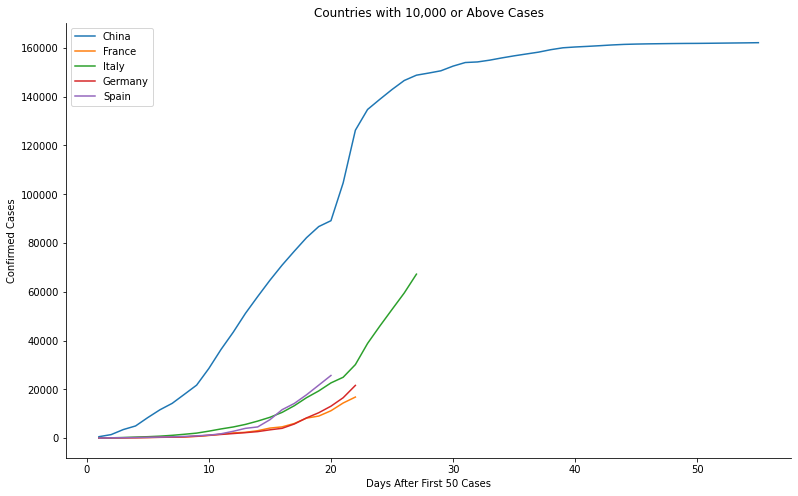

In [ ]:
# Countries with high number of cases (10,000 and above)

plt.figure(figsize=(13,8)) 
ax = fiftyDataFrame.iloc[29, 1:140].plot()
fiftyDataFrame.iloc[46, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[64, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[50, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[116, 1:140].plot(ax=ax)

ax.legend(['China', 'France', 'Italy','Germany','Spain'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Days After First 50 Cases')
plt.ylabel('Confirmed Cases')
plt.title("Countries with 10,000 or Above Cases")
plt.show()

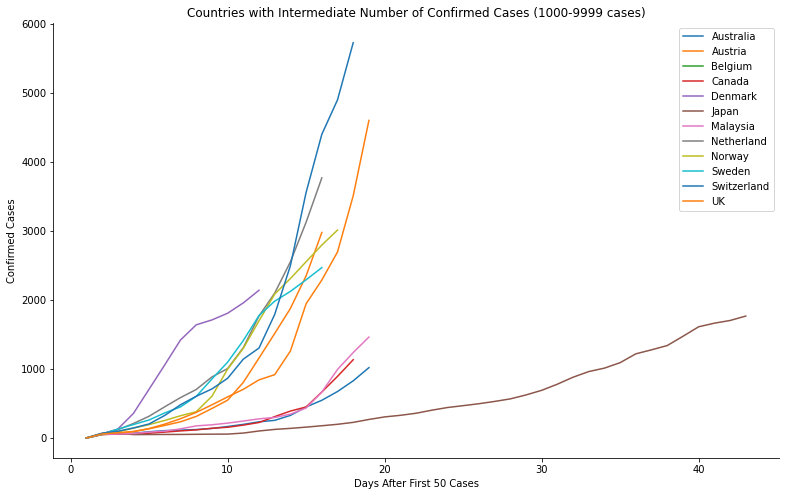

In [ ]:
plt.figure(figsize=(13,8)) 
ax = fiftyDataFrame.iloc[7, 1:140].plot()
fiftyDataFrame.iloc[8, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[9, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[25, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[36, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[66, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[78, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[91, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[95, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[120, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[121, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[130, 1:140].plot(ax=ax)

ax.legend(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Japan', 'Malaysia', 'Netherland', 'Norway', 'Sweden', 'Switzerland', 'UK'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Countries with Intermediate Number of Confirmed Cases (1000-9999 cases)')
plt.xlabel('Days After First 50 Cases')
plt.ylabel('Confirmed Cases')
plt.show()


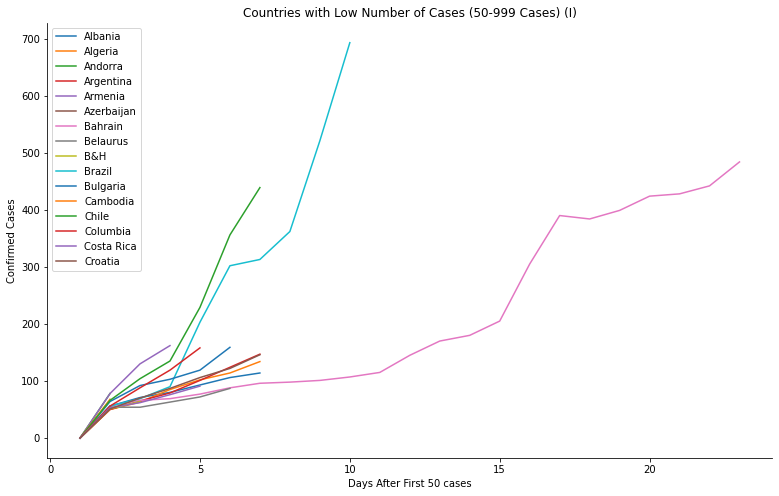

In [ ]:
plt.figure(figsize=(13,8))
ax = fiftyDataFrame.iloc[1, 1:140].plot()
fiftyDataFrame.iloc[2, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[3, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[5, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[6, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[9, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[11, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[14, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[19, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[20, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[21, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[23, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[28, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[30, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[31, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[33, 1:140].plot(ax=ax)

ax.legend(['Albania', 'Algeria', 'Andorra', 'Argentina','Armenia','Azerbaijan','Bahrain','Belaurus','B&H','Brazil','Bulgaria','Cambodia','Chile','Columbia','Costa Rica','Croatia'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Countries with Low Number of Cases (50-999 Cases) (I)')
plt.xlabel('Days After First 50 cases')
plt.ylabel('Confirmed Cases')
plt.show()

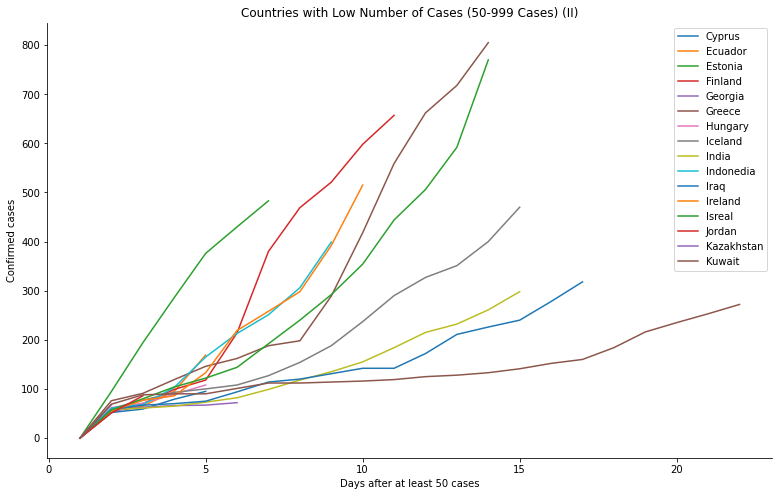

In [ ]:
# More countries with small amount of cases (50 to 999)
plt.figure(figsize=(13,8))

ax = fiftyDataFrame.iloc[35, 1:140].plot()
fiftyDataFrame.iloc[39, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[42, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[45, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[49, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[52, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[57, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[58, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[59, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[60, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[61, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[62, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[63, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[67, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[68, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[71, 1:140].plot(ax=ax)

ax.legend(['Cyprus', 'Ecuador', 'Estonia', 'Finland','Georgia','Greece','Hungary','Iceland','India','Indonedia','Iraq','Ireland','Isreal','Jordan','Kazakhstan','Kuwait'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Countries with Low Number of Cases (50-999 Cases) (II)')
plt.xlabel('Days after at least 50 cases')
plt.ylabel('Confirmed cases')
plt.show()

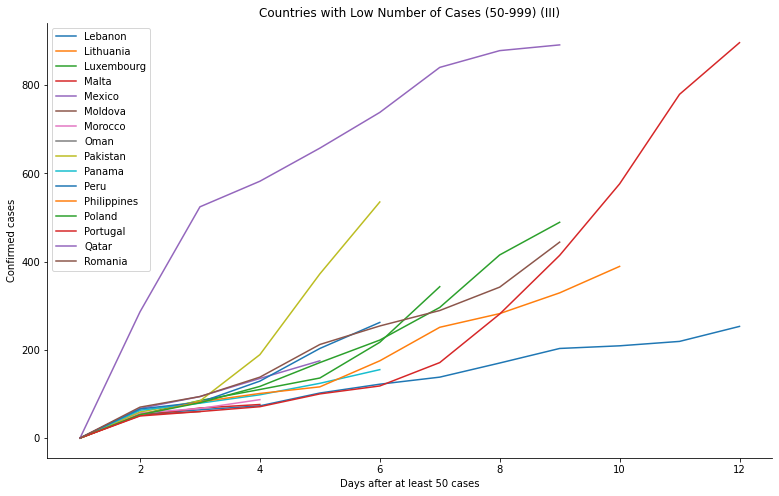

In [ ]:
# More countries with small amount of cases (50 to 999)

plt.figure(figsize=(13,8))

ax = fiftyDataFrame.iloc[73, 1:140].plot()
fiftyDataFrame.iloc[76, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[77, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[80, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[83, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[84, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[88, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[96, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[97, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[98, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[100, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[101, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[102, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[103, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[104, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[105, 1:140].plot(ax=ax)

ax.legend(['Lebanon', 'Lithuania', 'Luxembourg', 'Malta','Mexico','Moldova','Morocco','Oman','Pakistan','Panama','Peru','Philippines','Poland','Portugal','Qatar','Romania'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Countries with Low Number of Cases (50-999) (III)')
plt.xlabel('Days after at least 50 cases')
plt.ylabel('Confirmed cases')
plt.show()

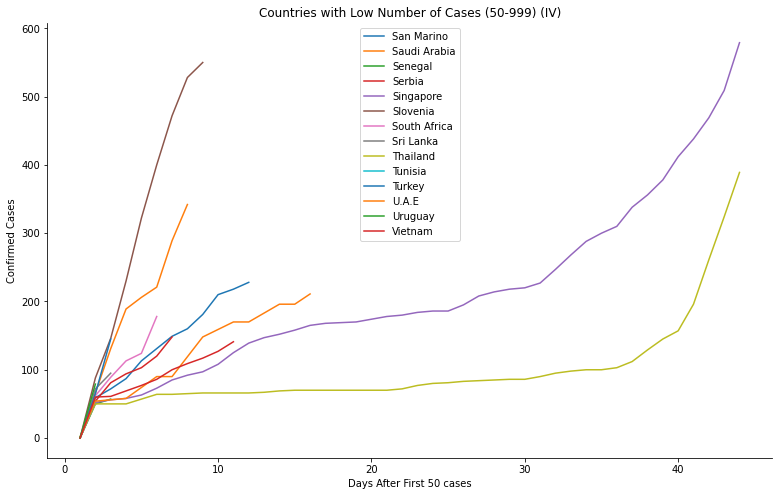

In [ ]:
# More countries with small amount of cases (50 to 999)

plt.figure(figsize=(13,8))

ax = fiftyDataFrame.iloc[107, 1:140].plot()
fiftyDataFrame.iloc[108, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[109, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[110, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[112, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[113, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[115, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[117, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[123, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[126, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[127, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[129, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[131, 1:140].plot(ax=ax)
fiftyDataFrame.iloc[133, 1:140].plot(ax=ax)


ax.legend(['San Marino', 'Saudi Arabia', 'Senegal', 'Serbia','Singapore','Slovenia','South Africa','Sri Lanka','Thailand','Tunisia','Turkey','U.A.E','Uruguay','Vietnam'])
plt.xlabel('Days After First 50 cases')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Countries with Low Number of Cases (50-999) (IV)')
plt.ylabel('Confirmed Cases')
plt.show()

## 6. Concluding remarks

Please see report for concluding remarks.